<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/Tarea_corta_Clasificaci%C3%B3n_de_ping%C3%BCinos_usando_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Fuente del dataset: https://github.com/Cordero27/Minor-Machine-Learning/blob/main/penguins_size.csv
#Se utiliza el archivo .CSV de Kaggle que contiene los datos originales combinados para 3 especies de pingüinos, no el simplificado.
penguins = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/penguins_size.csv')

In [3]:
#Vista previa del dataset
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
#Notamos que las columnas NO tienen el mismo largo, por lo que debemos balancear las columnas del dataframe
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#Para balancear las columnas eliminaremos las filas del dataset que contengan al menos un NA, pues su presencia alteran los resultados.
#Guardaremos el dataset modificado en un dataframe llamado penguinsWONA (penguins WithOut NA).
penguinsWONA =  penguins.dropna()

In [6]:
#Verificamos que ya no existen NAs en el dataset, realizando una sumatoria por columna de la cantidad de NAs que posee.
penguinsWONA.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
#Con el dataset más limpio podemos realizar calculos estadísticos de las columnas contínuas.
penguinsWONA.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
#El próximo paso es representar las columnas categoricas con números enteros.
penguinsWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
#Notamos que en la columna "sex" hay 3 valores posibles, por lo que revisando los datos de esa columna se encontró el caracter '.' en una de las filas.
#Por lo que se procede a eliminar la fila completa que contiene este elemento.
penguinsWONA = penguinsWONA.drop(penguinsWONA[penguinsWONA.sex == "."].index)
penguinsWONA

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
#Identificamos que las variables que no son numericas son de tipo "object", por lo cual debemos transformarlas a tipo "category"
penguinsWONA.loc[:, ("species")] = pd.Categorical(penguinsWONA.loc[:, ("species")])
penguinsWONA.loc[:, ("island")] = pd.Categorical(penguinsWONA.loc[:, ("island")])
penguinsWONA.loc[:, ("sex")] = pd.Categorical(penguinsWONA.loc[:, ("sex")])
penguinsWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   culmen_length_mm   333 non-null    float64 
 3   culmen_depth_mm    333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


In [11]:
#Ahora que ya tenemos las variables como tipo "category" podemos transformarlas a números enteros 
penguinsWONA.loc[:, ("species")] = penguinsWONA.species.cat.codes
penguinsWONA.loc[:, ("island")] = penguinsWONA.island.cat.codes
penguinsWONA.loc[:, ("sex")] = penguinsWONA.sex.cat.codes
penguinsWONA

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [12]:
#Confirmamos que las columnas son de un tipo numerico, y además, son de un tipo que requiere menos espacio en la memoria (int8)
penguinsWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int8   
 1   island             333 non-null    int8   
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int8   
dtypes: float64(4), int8(3)
memory usage: 14.0 KB


In [13]:
#El próximo paso es normalizar las features contínuas, para que los resultados no se vean alterados con los sesgos.
#Para esto usamos el metodo de minimo-máximo, el cual trabaja con el mínimo, máximo y rango de la colúmna.

penguinsNormalized = penguinsWONA.copy()
  
penguinsNormalized["culmen_length_mm"] = (penguinsNormalized["culmen_length_mm"] - penguinsNormalized["culmen_length_mm"].min()) / (penguinsNormalized["culmen_length_mm"].max() - penguinsNormalized["culmen_length_mm"].min())    
penguinsNormalized["culmen_depth_mm"] = (penguinsNormalized["culmen_depth_mm"] - penguinsNormalized["culmen_depth_mm"].min()) / (penguinsNormalized["culmen_depth_mm"].max() - penguinsNormalized["culmen_depth_mm"].min())      
penguinsNormalized["flipper_length_mm"] = (penguinsNormalized["flipper_length_mm"] - penguinsNormalized["flipper_length_mm"].min()) / (penguinsNormalized["flipper_length_mm"].max() - penguinsNormalized["flipper_length_mm"].min())    
penguinsNormalized["body_mass_g"] = (penguinsNormalized["body_mass_g"] - penguinsNormalized["body_mass_g"].min()) / (penguinsNormalized["body_mass_g"].max() - penguinsNormalized["body_mass_g"].min())    

display(penguinsNormalized)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
4,0,2,0.167273,0.738095,0.355932,0.208333,0
5,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
338,2,0,0.549091,0.071429,0.711864,0.618056,0
340,2,0,0.534545,0.142857,0.728814,0.597222,0
341,2,0,0.665455,0.309524,0.847458,0.847222,1
342,2,0,0.476364,0.202381,0.677966,0.694444,0


In [14]:
#Una vez normalizado podemos dividir el dataset en 2.
#Primero, dividimos del dataset en columnas independientes y dependientes ("operadoras" y "resultado").
#En este caso, clasificaremos a los pingüinos por sexo, por lo que será esta la feature a predecir.
X = penguinsNormalized.iloc[:, 0:6]
y = penguinsNormalized.iloc[:, 6]
#Luego dividimos el dataset completo en conjunto de entrenamiento y pruebas, donde este ultimo será el 20% del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [15]:
#Confirmamos el tamaño de los nuevos datasets
print(X_train.count())
print("---------------------")
print(X_test.count())

species              266
island               266
culmen_length_mm     266
culmen_depth_mm      266
flipper_length_mm    266
body_mass_g          266
dtype: int64
---------------------
species              67
island               67
culmen_length_mm     67
culmen_depth_mm      67
flipper_length_mm    67
body_mass_g          67
dtype: int64


In [16]:
#Calculamos el valor de K para el K-Neighbors
K = math.sqrt(len(X_train))
K

16.30950643030009

In [18]:
# Inicializamos el KNN con el K aproximado, usando distancia euclidiana
classifier = KNeighborsClassifier(n_neighbors=16, p=2,metric='euclidean')

In [19]:
#Ajustamos el modelo
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [20]:
# Ejecutamos la predicción del subconjunto de pruebas.
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0], dtype=int8)

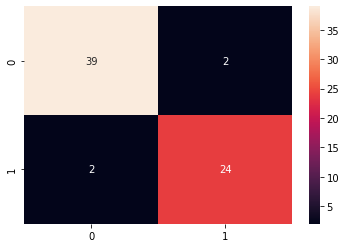

In [21]:
# Dibujamos una matriz de confusión para ver la precisión del modelo
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [22]:
#Observamos el porcentaje de precisión del modelo.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.92      0.92      0.92        26

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67



In [23]:
#Para confirmar que K=16 es el mejor valor de este hiperparámetros, calculamos la tasa de error del modelo con un K entre 1 y 40.
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

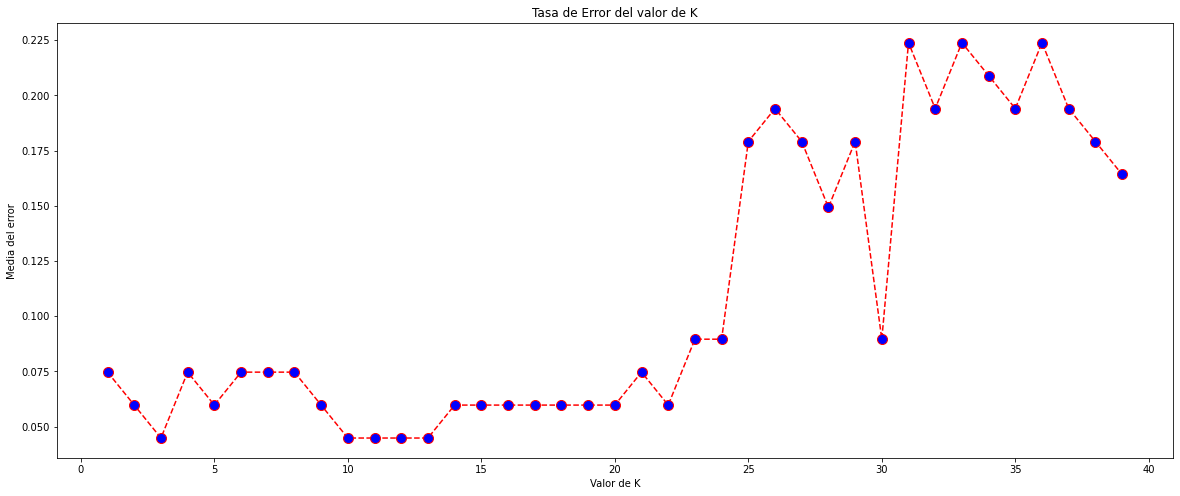

In [24]:
#Graficaremos la tasa de error del modelo
plt.figure(figsize=(20, 8))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Tasa de Error del valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Media del error')
plt.show()

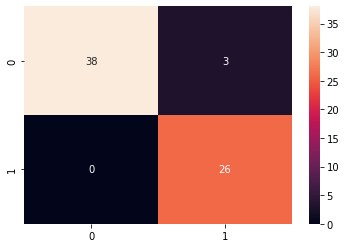

In [46]:
#En el gráfico anterior visualizamos que los mejores valores para K son 3, 10, 11, 12 y 13.
#Es por esto, que procedemos a volver a ejecutar el KNN, pero con K=3
classifier = KNeighborsClassifier(n_neighbors=3, p=2,metric='euclidean')
# Ajustamos el modelo
classifier.fit(X_train, y_train)
# Ejecutamos la predicción del subconjunto de pruebas.
y_pred = classifier.predict(X_test)
# Dibujamos una matriz de confusión para ver la precisión del modelo
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [47]:
#Observamos el porcentaje de precisión del modelo y notamos que se logra una mejora en la predicción del modelo.
#Sin embargo, esta no se evidencia claramente en la matriz anterior, debido a que no existe una variación importante en sus celdas.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.90      1.00      0.95        26

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



In [48]:
#Finalmente procedemos a ejecutar la validación cruzada usando K-Fold, donde K=10 (numero de divisiones del dataset)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=False)
predictionArray = cross_val_score(classifier, X, y, cv=cv)
predictionArray

array([0.76470588, 0.85294118, 0.85294118, 0.84848485, 0.81818182,
       0.87878788, 0.93939394, 0.93939394, 0.93939394, 0.96969697])

In [49]:
#Calculamos la media del arreglo de porcentajes anterior
#Esto nos permite ilustrar la certeza promedio resultante del modelo
predictionArray.mean()

0.8803921568627452